# Unsupervised Classification Analysis
# 02 - Kmeans clustering
## Marc Boulet
## Team Transparency, CSE 6242 Spring 2020


This notebook will take Team Transparency's merged dataset of country features and attempt to rank countries using an unsupervised Kmeans clustering model. 

I've used two distinct datasets:
- One dataset contains all 45 features from the merged.csv data integration. 
- The other contains 20 curated features, based on the correlation analysis from the **unsupervised_data** notebook. The idea is to remove heavily correlated features, which should provide a more robust model. However, I've kept both datasets for the team to visualize.


### Output summary

Each dataset has three different model outputs:

1) **kmeans_results_all.csv** (all features analyzed together)  
2) **kmeans_results_all_non_creative.csv** (a subset of non_creative features analyzed from the 45-feature dataset)  
3) **kmeans_results_all_creative.csv** (a subset of creative features analyzed from the 45-feature dataset)  

4) **kmeans_results_curated.csv** (all curated features analyzed together)  
5) **kmeans_results_curated_non_creative.csv** (a subset of non_cultural features analyzed from the 20-feature dataset)  
6) **kmeans_results_curated_creative.csv** (a subset of creative features analyzed from the curated 20-feature dataset)  

I've run three separate models to see if there are changes in cluster assignment based on cultural vs. non_cultural inputs.

All six models were run using an **n_cluster range** from 3 to 8, based on the elbow plot below. Not sure how many clusters are most appropriate, but it should be straighforward to QC them in the visualization for best results.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

## Load and split all features dataset

In [2]:
# load all features
df_all = pd.read_csv('df_all_features.csv')
df_all.head()

,country_iso,gii_human_capital,gii_domestic_credit,mobile_subscriptions,broadband_subscriptions_per100,gii_ict_services_imports,diversity_ethnicFractionalization,diversity_linguisticFractionalization,diversity_religiousFractionalization,literacy_rate,...,ease_of_business,gii_wikipedia_edits,gii_ict_access,gii_stem_assessment,poverty_ratio,foreign_investment,total_hospital_density_per_100k,gii_university_industry,gii_innovation_output,gdp_per_capta_usd
0,ABW,30.4,52.1,38.400524,14.664502,1.1,0.0000,0.3889,0.4107,97.307103,...,96.0,9.4,6.75,474.4,9.796272,3.200686,1.09,3.5,23.5,25444.983298
1,AFG,30.4,52.1,12.360732,0.011756,1.1,0.7693,0.6141,0.2717,30.972840,...,173.0,9.4,6.75,474.4,9.796272,0.824011,0.37,3.5,23.5,575.652428
2,AGO,30.4,52.1,11.679964,0.183138,1.1,0.7867,0.7870,0.6276,66.717765,...,177.0,9.4,6.75,474.4,31.200000,4.331602,1.09,3.5,23.5,4310.757348
3,ALB,22.7,35.0,31.171650,5.630488,1.5,0.2204,0.0399,0.4719,97.377008,...,82.0,16.0,5.30,415.2,1.140000,4.359191,1.36,3.3,18.3,4475.868233
4,AND,30.4,52.1,33.022121,26.791824,1.1,0.7139,0.6848,0.2326,85.047285,...,96.0,9.4,6.75,474.4,9.796272,2.116107,1.09,3.5,23.5,39559.167382


### Divide data into creative and non-creative features

In [3]:
df_all_non_creative = df_all[['country_iso',
                        'gii_domestic_credit',
                        'mobile_subscriptions',
                        'broadband_subscriptions_per100',
                        'gii_ict_services_imports',
                        'diversity_ethnicFractionalization',
                        'diversity_linguisticFractionalization',
                        'diversity_religiousFractionalization',
                        'literacy_rate',
                        'electrification',
                        'rural_population',
                        'school_enrollment_tertiary',
                        'gii_rule_of_law',
                        'population',
                        'mortality_rate',
                        'secure_internet_servers',
                        'gii_institutions',
                        'gii_top_level_domains',
                        'gii_research_talent_in_business',
                        'life_expectancy',
                        'ease_of_business',
                        'gii_ict_access',
                        'gii_stem_assessment',
                        'poverty_ratio',
                        'foreign_investment',
                        'total_hospital_density_per_100k',
                        'gii_university_industry',
                        'gdp_per_capta_usd', 
                        ]]

In [4]:
df_all_creative = df_all[['country_iso',
                    'gii_human_capital',
                    'gii_scientific_publications',
                    'rd_in_gdp',
                    'creative_svc_audiovisual',
                    'creative_svc_other_personal_cultural_recreational',
                    'creative_svc_advertising_mktresearch_polling',
                    'creative_svc_architectural_engineering_technical',
                    'creative_svc_personal_cultural_recreational',
                    'creative_svc_research',
                    'gii_creative_services', 
                    'gii_patent_applications',
                    'feature_films_produced',
                    'gii_patent_families',
                    'gii_mobile_apps',
                    'cultural_occupation',
                    'gii_creative_goods',
                    'gii_wikipedia_edits',
                    'gii_innovation_output',
                    ]]

## Load and split curated features dataset

In [38]:
# load curated feature set
df_curated = pd.read_csv('df_curated_features.csv')
df_curated.head()

,country_iso,mobile_subscriptions,gii_ict_services_imports,diversity_linguisticFractionalization,diversity_religiousFractionalization,creative_svc_audiovisual,creative_svc_other_personal_cultural_recreational,creative_svc_advertising_mktresearch_polling,creative_svc_architectural_engineering_technical,creative_svc_research,...,gii_creative_services,population,secure_internet_servers,gii_patent_applications,feature_films_produced,cultural_occupation,gii_creative_goods,foreign_investment,total_hospital_density_per_100k,gdp_per_capta_usd
0,ABW,38.400524,1.1,0.3889,0.4107,0.228829,0.268416,0.690171,1.296790,0.756533,...,0.4,7.575939e+04,613.851160,0.9,25.0,0.885,0.4,3.200686,1.09,25444.983298
1,AFG,12.360732,1.1,0.6141,0.2717,0.687106,0.083968,0.014596,0.103519,3.664092,...,0.4,1.802871e+07,12.873731,0.9,25.0,0.885,0.4,0.824011,0.37,575.652428
2,AGO,11.679964,1.1,0.7870,0.6276,0.228829,2.133165,0.690171,1.296790,0.756533,...,0.4,1.351811e+07,6.144484,0.9,5.0,0.885,0.4,4.331602,1.09,4310.757348
3,ALB,31.171650,1.5,0.0399,0.4719,0.713717,0.942318,0.773038,0.718214,0.136444,...,1.2,2.705824e+06,145.320398,0.6,5.0,0.885,0.2,4.359191,1.36,4475.868233
4,AND,33.022121,1.1,0.6848,0.2326,0.228829,0.268416,0.690171,1.296790,0.756533,...,0.4,5.111354e+04,2032.347465,0.9,25.0,0.885,0.4,2.116107,1.09,39559.167382


In [39]:
df_curated_non_creative = df_curated[['country_iso',
                                    'mobile_subscriptions',
                                    'gii_ict_services_imports',
                                    'diversity_linguisticFractionalization',
                                    'diversity_religiousFractionalization',
                                    'school_enrollment_tertiary',
                                    'population',
                                    'secure_internet_servers',
                                    'foreign_investment',
                                    'total_hospital_density_per_100k',
                                    'gdp_per_capta_usd', 
                                    ]]

In [40]:
df_curated_creative = df_curated[['country_iso',
                                    'creative_svc_audiovisual',
                                    'creative_svc_other_personal_cultural_recreational',
                                    'creative_svc_advertising_mktresearch_polling',
                                    'creative_svc_architectural_engineering_technical',
                                    'creative_svc_research',
                                    'gii_creative_services', 
                                    'gii_patent_applications',
                                    'feature_films_produced',
                                    'cultural_occupation',
                                    'gii_creative_goods',
                                    ]]

## Analysis

I was too lazy to build functions for the scaling and k-means steps, so I just change the dataset in the following cell and run through the analysis to produce the individual results.

In [59]:
# pick dataset to run through analysis (too lazy to build function)
df = df_curated_creative.copy()
# label for filename
data_label = 'curated_creative'

### Scale data

In [60]:
# scale numeric features 
scaler = StandardScaler()
df.loc[:,df.columns != 'country_iso'] = scaler.fit_transform(df.loc[:,df.columns != 'country_iso'].to_numpy())
df.head()

,country_iso,creative_svc_audiovisual,creative_svc_other_personal_cultural_recreational,creative_svc_advertising_mktresearch_polling,creative_svc_architectural_engineering_technical,creative_svc_research,gii_creative_services,gii_patent_applications,feature_films_produced,cultural_occupation,gii_creative_goods
0,ABW,-0.168019,-0.214799,-0.195323,-0.155561,-0.153334,-0.180212,-0.200298,-0.176617,-0.082701,-0.287905
1,AFG,0.596325,-0.470511,-0.940782,-1.004793,4.011412,-0.180212,-0.200298,-0.176617,-0.082701,-0.287905
2,AGO,-0.168019,2.370429,-0.195323,-0.155561,-0.153334,-0.180212,-0.200298,-0.319303,-0.082701,-0.287905
3,ALB,0.640709,0.719477,-0.103883,-0.567324,-1.041541,1.148698,-0.244633,-0.319303,-0.082701,-0.402308
4,AND,-0.168019,-0.214799,-0.195323,-0.155561,-0.153334,-0.180212,-0.200298,-0.176617,-0.082701,-0.287905


### k-means clustering

In [61]:
# set up results in separate dataframe
kmeans_results= pd.DataFrame(data=df['country_iso'], columns = ['country_iso'])

In [62]:
# remove country labels for clustering algo
df.drop(['country_iso'], axis = 1, inplace = True)

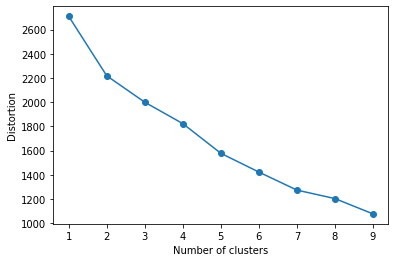

In [63]:
# calculate distortion for a range of n_cluster values
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [64]:
# calculate clusters for a range of n_cluster values
distortions = []
for i in range(3, 9):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    kmeans_results['clusters_' + str(i)] = km.labels_


In [65]:
kmeans_results

,country_iso,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8
0,ABW,1,0,0,0,0,0
1,AFG,1,0,0,0,0,4
2,AGO,1,0,3,0,0,0
3,ALB,1,0,0,0,0,0
4,AND,1,0,0,0,0,0
...,...,...,...,...,...,...,...
266,XKX,1,0,0,0,0,0
267,YEM,1,0,0,0,0,0
268,ZAF,1,0,0,0,0,0
269,ZMB,1,0,3,3,3,6


In [66]:
# example results
km.labels_

array([0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 7, 0, 0, 0, 6,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 4, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 3, 4, 0, 0, 0, 7, 0, 0, 6, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 5, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 6, 0])

In [67]:
# Write to .csv file
kmeans_results.to_csv('kmeans_results_' + str(data_label) + '.csv',index=False)